# Semana 1: Espacios Vectoriales
## Alumnos:

- Escriba Flores, Daniel
- Palma Gongora, Fiorella

---

In [1]:

import pandas as pd

In [2]:
data = pd.read_csv('iris.csv')
data

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [3]:
# Número de missing por columnas
data.isnull().sum()

Sepal.Length    0
Sepal.Width     0
Petal.Length    0
Petal.Width     0
Species         0
dtype: int64

In [4]:
# Tipo de Variables
data.dtypes

Sepal.Length    float64
Sepal.Width     float64
Petal.Length    float64
Petal.Width     float64
Species          object
dtype: object

In [5]:
data1 = pd.read_csv('iris.csv')
data1['Sepal.Total'] = data1['Sepal.Length'] + data1['Sepal.Width']
data1

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,Sepal.Total
0,5.1,3.5,1.4,0.2,setosa,8.6
1,4.9,3.0,1.4,0.2,setosa,7.9
2,4.7,3.2,1.3,0.2,setosa,7.9
3,4.6,3.1,1.5,0.2,setosa,7.7
4,5.0,3.6,1.4,0.2,setosa,8.6
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,9.7
146,6.3,2.5,5.0,1.9,virginica,8.8
147,6.5,3.0,5.2,2.0,virginica,9.5
148,6.2,3.4,5.4,2.3,virginica,9.6


In [6]:
data1['Sepal.Dif'] = data1['Sepal.Length'] - data1['Sepal.Width']
data1

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,Sepal.Total,Sepal.Dif
0,5.1,3.5,1.4,0.2,setosa,8.6,1.6
1,4.9,3.0,1.4,0.2,setosa,7.9,1.9
2,4.7,3.2,1.3,0.2,setosa,7.9,1.5
3,4.6,3.1,1.5,0.2,setosa,7.7,1.5
4,5.0,3.6,1.4,0.2,setosa,8.6,1.4
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,9.7,3.7
146,6.3,2.5,5.0,1.9,virginica,8.8,3.8
147,6.5,3.0,5.2,2.0,virginica,9.5,3.5
148,6.2,3.4,5.4,2.3,virginica,9.6,2.8


In [7]:
data1 = data1.drop(['Sepal.Length','Sepal.Width','Petal.Length','Petal.Width'],axis=1)
data1

,Species,Sepal.Total,Sepal.Dif
0,setosa,8.6,1.6
1,setosa,7.9,1.9
2,setosa,7.9,1.5
3,setosa,7.7,1.5
4,setosa,8.6,1.4
...,...,...,...
145,virginica,9.7,3.7
146,virginica,8.8,3.8
147,virginica,9.5,3.5
148,virginica,9.6,2.8


In [8]:
# Tomando solo las variables numéricas
v_numericas = data.select_dtypes(["float64","int64"])
v_numericas = list(v_numericas)
v_numericas

['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width']

In [9]:
data =  data[v_numericas]
data

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [10]:
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [11]:
# Entrenando y escalando los datos
pca_pipe = make_pipeline(StandardScaler(),PCA())
pca_pipe.fit(data)
modelo_pca = pca_pipe.named_steps['pca']

In [12]:
# convirtiendo el array a dataframe
pd.DataFrame(data = modelo_pca.components_,columns = data.columns,index = ['CP1','CP2','CP3','CP4'])

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
CP1,0.521066,-0.269347,0.580413,0.564857
CP2,0.377418,0.923296,0.024492,0.066942
CP3,0.719566,-0.244382,-0.142126,-0.634273
CP4,-0.261286,0.123510,0.801449,-0.523597


In [14]:
import numpy as np
import matplotlib.pyplot as plt

Porcentaje de varianza explicada acumulada
[0.72962445 0.95813207 0.99482129 1.        ]


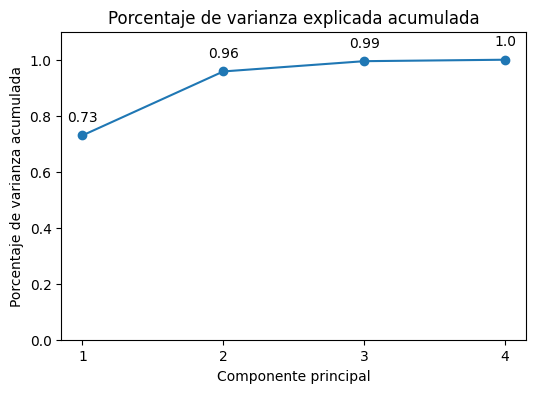

In [15]:
# Porcentaje de varianza explicada acumulada
por_var_acum = modelo_pca.explained_variance_ratio_.cumsum()
print('Porcentaje de varianza explicada acumulada')
print(por_var_acum)

fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(6,4))
ax.plot(np.arange(len(data.columns)) + 1,por_var_acum, marker='o')

for x, y in zip(np.arange(len(data.columns)) + 1, por_var_acum):
    label = round(y,2)
    ax.annotate(label,(x,y),textcoords="offset points",xytext=(0,10),ha='center')
    
ax.set_ylim(0,1.1)
ax.set_xticks(np.arange(modelo_pca.n_components_) + 1)
ax.set_title('Porcentaje de varianza explicada acumulada')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Porcentaje de varianza acumulada');

In [21]:

pca_pipe_final = make_pipeline(StandardScaler(),PCA(n_components = 2))
pca_pipe_final.fit(data)
modelo_pca_final = pca_pipe_final.named_steps['pca']

In [22]:
# convirtiendo el array a dataframe
data2 = pd.DataFrame(data = modelo_pca_final.components_,columns = data.columns,index = ['CP1','CP2'])
data2

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
CP1,0.521066,-0.269347,0.580413,0.564857
CP2,0.377418,0.923296,0.024492,0.066942


In [18]:
n=len(data2)
for i in range(n):
    print("CP{:.0f} = {:.6f}Sepal Lenght + {:.6f}Sepal Width + {:.6f}Petal Lenght + {:.6f}Petal Width".
         format(i+1,data2['Sepal.Length'][i],data2['Sepal.Width'][i],data2['Petal.Length'][i],data2['Petal.Width'][i]))

CP1 = 0.521066Sepal Lenght + -0.269347Sepal Width + 0.580413Petal Lenght + 0.564857Petal Width
CP2 = 0.377418Sepal Lenght + 0.923296Sepal Width + 0.024492Petal Lenght + 0.066942Petal Width


C:\Users\Danie\AppData\Local\Temp\ipykernel_17396\2837234645.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  format(i+1,data2['Sepal.Length'][i],data2['Sepal.Width'][i],data2['Petal.Length'][i],data2['Petal.Width'][i]))


In [23]:
componentes_principales = pd.DataFrame(data = modelo_pca_final.transform(data.values),columns=['CP1','CP2'])
componentes_principales

,CP1,CP2
0,2.640270,5.204041
1,2.670730,4.666910
2,2.454606,4.773636
3,2.545517,4.648463
4,2.561228,5.258629
...,...,...
145,7.000417,5.579908
146,6.584640,4.935618
147,6.726747,5.484342
148,6.748228,5.765416
